In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e = np.exp(1)
d = 10
n = 5
ITER = 50
lamb = .1
fstar = -0.8414077

In [3]:
# Define the maxquad function
A = np.zeros((n, d, d))
b = np.zeros((n, d))

for k in range(1,n+1,1):
	for i in range(1,d+1,1):
		for j in range(1,d+1,1):
			if j > i:
				A[k-1,i-1,j-1] = (e**(i/j)) * np.cos(i*j) * np.sin(k)

	for i in range(1,d+1,1):
		for j in range(1,d+1,1):
			if j < i:
				A[k-1,i-1,j-1] = A[k-1,j-1,i-1]
		b[k-1,i-1] = (e**(i/k)) * np.sin(i*k)

	for i in range(1,d+1,1):
		A[k-1,i-1,i-1] = np.sum(np.abs(A[k-1,i-1,:])) + i/d * np.abs(np.sin(k))

In [12]:
# define evaluation of quad(k) on input x
def quad(k,x):
    return x.T @ A[k,:,:] @ x  - b[k,:] @ x

# define maxquad function
def maxquad(x):
    return max([quad(k,x) for k in np.arange(n)])

# define maxquad gradient
def maxquad_gradient(x):
	allevals = [quad(k,x) for k in np.arange(n)]
	idx = np.argmax(allevals)
	return 2*np.transpose(A[idx,:,:]) @ x - b[idx,:]

In [13]:
# # define evaluation of quad(k) on input x
# def quad(k,x):
#     return x.T @ A[k,:,:] @ x  - b[k,:] @ x

# # define maxquad function
# def maxquad(x):
#     return cvx.max(cvx.hstack([quad(k,x) for k in np.arange(n)]))

# # define maxquad gradient
# def maxquad_gradient(x):
# 	allevals = [quad(k,x) for k in np.arange(n)]
# 	idx = np.argmax(allevals)
# 	return 2*np.transpose(A[idx,:,:]) @ x - b[idx,:]

In [14]:
maxquad(np.ones((10,)))

5337.0664293113605

In [15]:
def f_i(x_lst, x):
    return cvx.max(cvx.hstack([maxquad(x_j) + maxquad_gradient(x_j) @ (x - x_j) for x_j in x_lst]))

def f_min(x_lst):
    return min([maxquad(x_j) for x_j in x_lst])

def min_f_i(f_i, x_lst):
    x = cvx.Variable(shape=(d,), name = "x")
    constraint = [cvx.norm(x, 2) <= 1]
    obj = cvx.Minimize(f_i(x_lst, x))
    prob = cvx.Problem(obj, constraint)
    prob.solve()
    return obj.value

"""Euclidean projection"""
def projection(x, x_lst, l_i):
    y = cvx.Variable(shape=(d,), name = 'y')
    obj = cvx.Minimize(cvx.norm(x - y, 2))
    constraints = [cvx.norm(y, 2) <= 1, f_i(x_lst, y) <= l_i]
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    return y.value

In [16]:
def level_method():
    x_1 = np.ones((10,)) 
    x_lst = np.array([x_1])
    for i in range(ITER):
        print(i)
        f_minus, f_plus = min_f_i(f_i, x_lst), f_min(x_lst)
        print('f-', f_minus, 'f+', f_plus)
        l_i = lamb * f_minus + (1 - lamb) * f_plus
        x_next = np.array([projection(x_lst[-1], x_lst, l_i)])
#         print(l_i)
        print(x_next)
        x_lst = np.append(x_lst, x_next, axis=0)
    return x_lst

In [17]:
x_iters = level_method()

0
f- -12889.512475110767 f+ 5337.0664293113605
[[0.31622816 0.31622816 0.31622816 0.31622812 0.31622805 0.31622807
  0.3162287  0.31623042 0.31623072 0.31621909]]
1
f- -12815.315169709083 f+ 1670.5626286954139
[[0.31622909 0.31624572 0.31620074 0.315817   0.31493229 0.3151885
  0.32252749 0.34223637 0.34568363 0.21035876]]
2
f- -12813.320657555369 f+ 222.0843325501626
[[0.31622793 0.31626253 0.31617721 0.31544582 0.31376865 0.31425198
  0.32819792 0.36564186 0.37218996 0.1150835 ]]
3
f- -63.71154644275147 f+ 16.881945833536534
[[0.31574804 0.31395247 0.31369258 0.315779   0.31025521 0.3089051
  0.33610998 0.35866755 0.34846763 0.15817506]]
4
f- -63.162265050771104 f+ 8.847685919992534
[[0.31490905 0.30987196 0.30929147 0.31626993 0.30347057 0.29908263
  0.3526665  0.3570889  0.31887345 0.19024793]]
5
f- -29.702582016802207 f+ 8.788867331880116
[[0.25206071 0.26352381 0.27523067 0.29063287 0.2326415  0.21042872
  0.26753519 0.30874045 0.28904398 0.13523495]]
6
f- -22.903034378885884 f+ 

[[-0.12671719 -0.03394334 -0.00650166  0.02632808  0.06722119 -0.27817695
   0.07421659  0.13841167  0.08399444  0.03856761]]
49
f- -0.8414667714210623 f+ -0.8414014059482977
[[-0.12671719 -0.03394335 -0.00650165  0.02632811  0.06722115 -0.27817693
   0.07421658  0.13841167  0.08399443  0.03856771]]


<class 'numpy.ndarray'>
[5.33790784e+03 1.67140404e+03 2.22925740e+02 1.77233535e+01
 9.68909362e+00 9.63027503e+00 6.52581243e+00 4.69292277e+00
 3.02672742e+00 3.97005943e+00 2.42063792e+00 1.55146878e+00
 1.18388274e+00 7.16099012e-01 3.62966653e-01 2.24835573e-01
 8.96577354e-01 2.65715652e-01 1.16213382e-01 5.28060649e-02
 8.00756554e-02 2.16391755e-02 1.16150259e-02 2.15822265e-02
 1.22515318e-02 1.50907756e-03 2.74107045e-02 2.43757351e-02
 7.46964623e-03 7.61418231e-03 6.08731857e-03 2.15496210e-03
 1.59850146e-03 1.42273197e-03 1.05363471e-03 8.21766176e-04
 5.49691372e-04 5.89187919e-04 3.12514251e-04 2.13122565e-04
 1.42720355e-04 2.83467648e-04 1.16551763e-04 1.17526201e-04
 7.81607502e-05 1.06030947e-04 5.14035680e-05 1.90950567e-05
 6.29405170e-06 1.35889585e-05 6.24260367e-06]


Text(0.5, 1.0, 'num iterations vs. suboptimality gap')

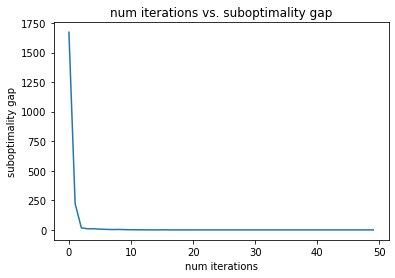

In [18]:
val = [maxquad(x) for x in x_iters] - fstar * np.ones(50 + 1)
print(type(val))
print(val)
plt.plot(np.arange(50), val[1:])
plt.xlabel('num iterations')
plt.ylabel('suboptimality gap')
plt.title('num iterations vs. suboptimality gap')

In [19]:
t = np.array([1])
t = np.append(t, 2)